# Pull Data from Foursquare API:

## Import Required Libraries for Analysis:

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

import urllib.request
import requests #
from pandas.io.json import json_normalize 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Set up Requests to Foursquare API:

### Set up Request for Info on BJJ Gyms within 40 km of Toronto:

In [2]:
CLIENT_ID='0ROHPCGGNFZL5POUBD5HTXZ3WGW2Q4WKFBPMY2RYT3OHOHWJ'
CLIENT_SECRET='UOTYEKCXCEGJRGFQ04D25NBWKRTGIOTDVIYNIBGBSKNYBDJS'
VERSION='20180604'

#latitudes and longitudes for Toronto taken from Google
lat=43.6532
lng=-79.3832

#establish search queries to loop through. Gyms could have some variety to their names
search_query=['Brazilian Jiu Jitsu','BJJ','MMA']

radius=40000 #look for all gyms within 40 km of the Toronto
LIMIT=75

#create empty list to store results from API call as we loop through the search criteria
results=[]
            
# create the API request URL (taken from assignments) to search Toronto for BJJ gyms
for tag in range(0,len(search_query)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        lat, 
        lng, 
        VERSION, 
        search_query[tag], 
        radius, 
        LIMIT)
    url
    # make the GET request, and start to fill results as you loop through search criteria
    results += requests.get(url).json()['response']['venues']

results[0:2]


[{'id': '4ca4c3fefcaebfb7f545cd84',
  'name': 'Casa Jiu-Jitsu',
  'location': {'address': '251 Harbord St.',
   'crossStreet': 'Harbord at Bathurst',
   'lat': 43.661325,
   'lng': -79.410514,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.661325,
     'lng': -79.410514}],
   'distance': 2378,
   'postalCode': 'M6G 1G1',
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['251 Harbord St. (Harbord at Bathurst)',
    'Toronto ON M6G 1G1',
    'Canada']},
  'categories': [],
  'referralId': 'v-1589506175',
  'hasPerk': False},
 {'id': '4f09c9c6e4b0e8ed38e8f39e',
  'name': 'Bushido Jiu Jitsu',
  'location': {'address': '5030 Maingate Dr.',
   'crossStreet': 'Eglinton Ave. E.',
   'lat': 43.62970011920928,
   'lng': -79.62859948707742,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.62970011920928,
     'lng': -79.62859948707742}],
   'distance': 19941,
   'cc': 'CA',
   'city': 'Mississauga',
   'state': 'ON',
   'cou

### Extract category label from results:

In [3]:
#create blank array to store category labels
category=[]

#loop through results and pull category labels
for i in range(0,len(results)):
    try:
        tag=results[i]['categories'][0]['name']
    except:
        #return NaN if no categories available
        tag=np.nan
    category.append(tag)

category

[nan,
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Electronics Store',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'College Gym',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Martial Arts Dojo',
 'Event Space',
 'Martial Arts Dojo',
 'Athletics & Sports',
 'Gym / Fitness Center',
 'Gym / Fitness Center',
 'Martial Arts Dojo',
 "Men's Store",
 'Office',
 'Advertising Agency',
 'Other Nightlife',
 'Financial or Legal Service']

### Convert Foursquare data into pandas dataframe:

In [4]:
gym_df = json_normalize(results)
gym_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4ca4c3fefcaebfb7f545cd84,Casa Jiu-Jitsu,[],v-1589506175,False,251 Harbord St.,Harbord at Bathurst,43.661325,-79.410514,"[{'label': 'display', 'lat': 43.661325, 'lng':...",2378,M6G 1G1,CA,Toronto,ON,Canada,"[251 Harbord St. (Harbord at Bathurst), Toront...",NaN
1,4f09c9c6e4b0e8ed38e8f39e,Bushido Jiu Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1589506175,False,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,"[{'label': 'display', 'lat': 43.62970011920928...",19941,NaN,CA,Mississauga,ON,Canada,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ...",NaN
2,51a6e2a97dd2a9f7847cf042,Salvosa Brazillian Jiu-Jitsu Academy,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1589506175,False,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,"[{'label': 'display', 'lat': 43.77531212425443...",21739,M1P 4S6,CA,Scarborough,ON,Canada,"[31 Progress Ave Unit #1, Scarborough ON M1P 4...",NaN
3,57d75954498e283890bb2c39,Buckley Jiu-Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1589506175,False,1029 Speers Rd,NaN,43.433083,-79.703606,"[{'label': 'display', 'lat': 43.433083, 'lng':...",35620,L6L 2X5,CA,Oakville,ON,Canada,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]",NaN
4,4f4c03b0e4b0657aa3bdb0df,Milton Jiu-Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1589506175,False,310 Main St,NaN,43.515812,-79.879993,"[{'label': 'display', 'lat': 43.51581191610982...",42878,NaN,CA,Milton,ON,Canada,"[310 Main St, Milton ON, Canada]",NaN


### Clean up dataframe:

#### Drop unnecessary columns:

In [5]:
gym_df.drop(['id','referralId','hasPerk','venuePage.id','location.postalCode','location.labeledLatLngs','location.cc','location.distance','location.country'],axis=1,inplace=True)
gym_df.head()

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.city,location.state,location.formattedAddress
0,Casa Jiu-Jitsu,[],251 Harbord St.,Harbord at Bathurst,43.661325,-79.410514,Toronto,ON,"[251 Harbord St. (Harbord at Bathurst), Toront..."
1,Bushido Jiu Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
2,Salvosa Brazillian Jiu-Jitsu Academy,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
3,Buckley Jiu-Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
4,Milton Jiu-Jitsu,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"


#### Replace raw category data with category tags that were extracted:

In [6]:
gym_df['categories']=category
gym_df.head()

,name,categories,location.address,location.crossStreet,location.lat,location.lng,location.city,location.state,location.formattedAddress
0,Casa Jiu-Jitsu,NaN,251 Harbord St.,Harbord at Bathurst,43.661325,-79.410514,Toronto,ON,"[251 Harbord St. (Harbord at Bathurst), Toront..."
1,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
2,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
3,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
4,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"


#### Clean up column names:

In [7]:
# clean column names by keeping only last term (from assignment)
gym_df.columns = [column.split('.')[-1] for column in gym_df.columns]

gym_df.head()

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress
0,Casa Jiu-Jitsu,NaN,251 Harbord St.,Harbord at Bathurst,43.661325,-79.410514,Toronto,ON,"[251 Harbord St. (Harbord at Bathurst), Toront..."
1,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
2,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
3,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
4,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"


#### Drop any rows that are not categorized:

In [8]:
#looks for NaN values in 'categories' column
gym_df.dropna(subset=['categories'],axis=0,inplace=True)

gym_df.head(10)

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress
1,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
2,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
3,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
4,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"
5,Bama - Burlington Academy of Martial Arts,Martial Arts Dojo,3295 Mainway Dr # 4,Guelph Line,43.373619,-79.804549,Burlington,ON,"[3295 Mainway Dr # 4 (Guelph Line), Burlington..."
6,Toronto BJJ & MMA Academy,Martial Arts Dojo,NaN,Bloor West & Crawford,43.662768,-79.421832,Toronto,ON,"[Bloor West & Crawford, Toronto ON, Canada]"
7,toronto bjj,Martial Arts Dojo,813 Bloor W,NaN,43.662828,-79.421429,Toronto,ON,"[813 Bloor W, Toronto ON, Canada]"
8,BJ Jeweler Antique,Electronics Store,64A Queen St E,Queen & Church,43.652539,-79.376014,Toronto,ON,"[64A Queen St E (Queen & Church), Toronto ON, ..."
9,Beaches BJJ,Martial Arts Dojo,2210 Queen St E,Spruce Hill Rd,43.672703,-79.289013,Toronto,ON,"[2210 Queen St E (Spruce Hill Rd), Toronto ON ..."
10,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,Wellesley St.,43.666172,-79.384767,Toronto,ON,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y..."


#### Remove any venues that don't have the 'Martial Arts Dojo' tag:

In [9]:
#find out what all the unique tags are in the dataframe
venue_labels=set(gym_df['categories'])
venue_labels

{'Advertising Agency',
 'Athletics & Sports',
 'College Gym',
 'Electronics Store',
 'Event Space',
 'Financial or Legal Service',
 'Gym / Fitness Center',
 'Martial Arts Dojo',
 "Men's Store",
 'Office',
 'Other Nightlife'}

In [10]:
#reset index
gym_df.reset_index(drop=True,inplace=True)
gym_df.head(10)

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress
0,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
2,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
3,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"
4,Bama - Burlington Academy of Martial Arts,Martial Arts Dojo,3295 Mainway Dr # 4,Guelph Line,43.373619,-79.804549,Burlington,ON,"[3295 Mainway Dr # 4 (Guelph Line), Burlington..."
5,Toronto BJJ & MMA Academy,Martial Arts Dojo,NaN,Bloor West & Crawford,43.662768,-79.421832,Toronto,ON,"[Bloor West & Crawford, Toronto ON, Canada]"
6,toronto bjj,Martial Arts Dojo,813 Bloor W,NaN,43.662828,-79.421429,Toronto,ON,"[813 Bloor W, Toronto ON, Canada]"
7,BJ Jeweler Antique,Electronics Store,64A Queen St E,Queen & Church,43.652539,-79.376014,Toronto,ON,"[64A Queen St E (Queen & Church), Toronto ON, ..."
8,Beaches BJJ,Martial Arts Dojo,2210 Queen St E,Spruce Hill Rd,43.672703,-79.289013,Toronto,ON,"[2210 Queen St E (Spruce Hill Rd), Toronto ON ..."
9,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,Wellesley St.,43.666172,-79.384767,Toronto,ON,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y..."


#### Keep only venues with relevant tags:

Get list of indexes that do not have a relevant tag:

In [11]:
#get index for venues with tags not related to sports/martial arts:
good_tags=['Athletics & Sports','College Gym','Community Center','Gym','Gym / Fitness Center','Martial Arts Dojo',]
bad_index=[]
i=0
j=0

#collects the index for all rows that don't contain a valid BJJ gym tag, outputs a list 'bad_index'
for i in range(0,len(gym_df['categories'])):
    for j in range(0,len(good_tags)):
        if gym_df.loc[i]['categories']==good_tags[j]:
            a=1
        else:
            a=0
    #if a==1 then the categories matched at some point in the loop       
    if a==0:
        bad_index.append(i)
bad_index

[7, 13, 18, 20, 21, 22, 24, 25, 26, 27, 28]

#### Drop rows from dataframe that have an index in 'bad_index':

In [12]:
#drop rows from data frame that don't have a valid BJJ gym category (anything that is in 'bad_index')
gym_df_filt=gym_df
gym_df_filt.drop(bad_index,axis=0,inplace=True)
gym_df_filt.reset_index(drop=True,inplace=True)
gym_df_filt.head(10)

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress
0,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ..."
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4..."
2,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]"
3,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]"
4,Bama - Burlington Academy of Martial Arts,Martial Arts Dojo,3295 Mainway Dr # 4,Guelph Line,43.373619,-79.804549,Burlington,ON,"[3295 Mainway Dr # 4 (Guelph Line), Burlington..."
5,Toronto BJJ & MMA Academy,Martial Arts Dojo,NaN,Bloor West & Crawford,43.662768,-79.421832,Toronto,ON,"[Bloor West & Crawford, Toronto ON, Canada]"
6,toronto bjj,Martial Arts Dojo,813 Bloor W,NaN,43.662828,-79.421429,Toronto,ON,"[813 Bloor W, Toronto ON, Canada]"
7,Beaches BJJ,Martial Arts Dojo,2210 Queen St E,Spruce Hill Rd,43.672703,-79.289013,Toronto,ON,"[2210 Queen St E (Spruce Hill Rd), Toronto ON ..."
8,Openmat Mixed Martial Arts,Martial Arts Dojo,593 Yonge St.,Wellesley St.,43.666172,-79.384767,Toronto,ON,"[593 Yonge St. (Wellesley St.), Toronto ON M4Y..."
9,Body Of Four BJJ,Martial Arts Dojo,2486 Dufferin street,Dufferin And Castlefield,43.706720,-79.468644,Toronto,ON,[2486 Dufferin street (Dufferin And Castlefiel...


### Export database as a .csv file for convenience and safe keeping:

In [358]:
gym_df_filt.to_csv(r'C:\Users\Evan\Documents\Python for Data Science\filtered_gyms.csv')

# Collect Data on Venues Surrounding BJJ Gyms:

## Get Lat & Long for all BJJ Gyms:

In [13]:
lats=gym_df_filt['lat']
longs=gym_df_filt['lng']


## Set up API Call:

In [14]:
CLIENT_ID='0ROHPCGGNFZL5POUBD5HTXZ3WGW2Q4WKFBPMY2RYT3OHOHWJ'
CLIENT_SECRET='UOTYEKCXCEGJRGFQ04D25NBWKRTGIOTDVIYNIBGBSKNYBDJS'
VERSION='20180604'

#establish explore call to loop through gyms and get surrounding venues
radius=1000 #look for all gyms within 500 m of the gyms
LIMIT=75

#create empty list to store results from API call as we loop through the different BJJ gyms
results2=[]

# create the API request URL (taken from assignments) to explore 
for i in range(0,len(gym_df_filt['lat'])):
    url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        lats[i], 
        longs[i], 
        VERSION,  
        radius, 
        LIMIT)
    url2
    results2 += requests.get(url2).json()['response']['groups']


## Extract info from Foursquare API call, and convert to dataframe:

In [15]:
#create empty lists to store data as we extract it
venue_name=[]
venue_cat=[]
venue_lat=[]
venue_lng=[]
venue_address=[]
venue_city=[]
distance=[]
name=[]

#step through the API pull and drop relevant information into the appropriate lists
for i in range(0,len(results2)):
    for j in range(0,len(results2[i]['items'])):
        #gets name of nearby venue
        try:
            venue_name.append(results2[i]['items'][j]['venue']['name'])
        except:
            venue_name.append(np.nan)
        
        #get category of nearby venue
        try:
            venue_cat.append(results2[i]['items'][j]['venue']['categories'][0]['name'])
        except:
            venu_cat.append(np.nan)

        #get latitude and longitude of nearby venue
        try:
            venue_lat.append(results2[i]['items'][j]['venue']['location']['lat'])
            venue_lng.append(results2[i]['items'][j]['venue']['location']['lng'])
        except:
            venue_lat.append(np.nan)
            venue_lng.append(np.nan)
            
        #get address of nearby venue
        try:
            venue_address.append(results2[i]['items'][j]['venue']['location']['address'])
        except:
            venue_address.append(np.nan)
            
        #get city of nearby venue
        try:
            venue_city.append(results2[i]['items'][j]['venue']['location']['city'])
        except:
            venue_city.append(np.nan)
        
        #get distance of nearby venue to BJJ gym
        try:
            distance.append(results2[i]['items'][j]['venue']['location']['distance'])
        except:
            distance.append(np.nan)
            
        #get closest BJJ gym
        name.append(gym_df_filt.loc[i]['name'])


## Create dataframe with lists containing organized API data:

In [16]:
#create dictionary of venue data to pass to dataframe
ven_dict={
    'venue_name':venue_name,
    'name':name,
    'distance_to_gym':distance,
    'venue_lat':venue_lat,
    'venue_lng':venue_lng,
    'venue_address':venue_address,
    'venue_city':venue_city,
    'venue_cat':venue_cat
}

#create dataframe
nearby_venues=pd.DataFrame(data=ven_dict)
nearby_venues.head()

,venue_name,name,distance_to_gym,venue_lat,venue_lng,venue_address,venue_city,venue_cat
0,On the bun,Bushido Jiu Jitsu,83,43.629843,-79.627587,14-5030 Maingate Dr,Mississauga,Burger Joint
1,Shandra's Roti Shop,Bushido Jiu Jitsu,107,43.630173,-79.627433,5030 Maingate Dr.,Mississauga,Caribbean Restaurant
2,Battle Arts Academy,Bushido Jiu Jitsu,494,43.625405,-79.630183,4880 Tomken Rd,Mississauga,Gym / Fitness Center
3,Starbucks,Bushido Jiu Jitsu,244,43.627514,-79.628820,1016 Eglinton Ave E,Mississauga,Coffee Shop
4,Studio 89,Bushido Jiu Jitsu,274,43.627425,-79.627279,"1065 Canadian Place, unit 104",Mississauga,Café


### export dataframe to csv for safe keeping:

In [80]:
nearby_venues.to_csv(r'C:\Users\Evan\Documents\Python for Data Science\nearby_venues.csv')

### drop venues that don't have any category tags:

In [17]:
nearby_venues.dropna(subset=['venue_cat'],axis=0,inplace=True)
nearby_venues.reset_index(drop=True,inplace=True)
nearby_venues.head()

,venue_name,name,distance_to_gym,venue_lat,venue_lng,venue_address,venue_city,venue_cat
0,On the bun,Bushido Jiu Jitsu,83,43.629843,-79.627587,14-5030 Maingate Dr,Mississauga,Burger Joint
1,Shandra's Roti Shop,Bushido Jiu Jitsu,107,43.630173,-79.627433,5030 Maingate Dr.,Mississauga,Caribbean Restaurant
2,Battle Arts Academy,Bushido Jiu Jitsu,494,43.625405,-79.630183,4880 Tomken Rd,Mississauga,Gym / Fitness Center
3,Starbucks,Bushido Jiu Jitsu,244,43.627514,-79.628820,1016 Eglinton Ave E,Mississauga,Coffee Shop
4,Studio 89,Bushido Jiu Jitsu,274,43.627425,-79.627279,"1065 Canadian Place, unit 104",Mississauga,Café


In [18]:
#let's see how many items we're dealing with...
nearby_venues.shape

(815, 8)

### "one hot encoding" the venue categories:

In [18]:
# one hot encoding and create dummies
venues_onehot = pd.get_dummies(nearby_venues[['venue_cat']], prefix="", prefix_sep="")

#insert venue name
venues_onehot.insert(loc=0, column='venue', value= nearby_venues['venue_name'])
venues_onehot.insert(loc=1, column='name', value= nearby_venues['name'])
venues_onehot.insert(loc=2, column='distance_to_gym', value= nearby_venues['distance_to_gym'])

venues_onehot.head()

,venue,name,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,On the bun,Bushido Jiu Jitsu,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shandra's Roti Shop,Bushido Jiu Jitsu,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Battle Arts Academy,Bushido Jiu Jitsu,494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Group venues by BJJ gym they are nearest to:

In [19]:
#group rows by BJJ gym and by taking the mean of the frequency of occurrence of each category¶
venues_grouped=venues_onehot.groupby('name').mean().reset_index()
venues_grouped.head()

,name,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,905 BJJ,557.500000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.25,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1,BJJ Mississauga,468.062500,0.0,0.0625,0.0,0.0,0.0,0.000000,0.0,0.

## Determine which venue categories surround each gym

In [20]:
#write a function to sort the venues in descending order (taken from assignment)

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
# print each neighborhood along with the top 5 most common venues (taken from assignment)

num_top_venues=5
indicators=['st', 'nd', 'rd']

#create columns according to number of top venues
columns=['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'. format (ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'. format (ind+1))

#create a new dataframe
nearby_venues_sorted=pd.DataFrame(columns=columns)
nearby_venues_sorted['name']=venues_grouped['name']

for ind in np.arange(venues_grouped.shape[0]):
    nearby_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

nearby_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,905 BJJ,Yoga Studio,Rental Car Location,Bowling Alley,Gym / Fitness Center,Event Space
1,BJJ Mississauga,Hotel,Restaurant,Coffee Shop,Chinese Restaurant,Department Store
2,BJJ Mississauga Kids Martial Arts,Coffee Shop,Gym,Rental Car Location,Sushi Restaurant,Fast Food Restaurant
3,Bama - Burlington Academy of Martial Arts,Park,Pizza Place,Pet Store,Coffee Shop,Gas Station
4,Beaches BJJ,Pub,Beach,Coffee Shop,Park,Breakfast Spot


# Cluster gyms using k-Means algorithm:

In [22]:
#initiate k-means
kclusters=3
k_means = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12)

bjj_grouped_clustering = venues_grouped.drop('name', 1)


In [23]:
#fit data:
k_means.fit(bjj_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
# check cluster labels generated for each row in the dataframe
k_means.labels_

array([2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2], dtype=int32)

## create dataframe to include cluster labels

In [25]:
nearby_venues_sorted['Cluster']=k_means.labels_
nearby_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,905 BJJ,Yoga Studio,Rental Car Location,Bowling Alley,Gym / Fitness Center,Event Space,2
1,BJJ Mississauga,Hotel,Restaurant,Coffee Shop,Chinese Restaurant,Department Store,0
2,BJJ Mississauga Kids Martial Arts,Coffee Shop,Gym,Rental Car Location,Sushi Restaurant,Fast Food Restaurant,1
3,Bama - Burlington Academy of Martial Arts,Park,Pizza Place,Pet Store,Coffee Shop,Gas Station,1
4,Beaches BJJ,Pub,Beach,Coffee Shop,Park,Breakfast Spot,2


## merge dataframes so that all attributes are in one dataframe

In [26]:
#create copy of bjj gym dataframe
bjj_merged = gym_df_filt

# merge gym dataframe with venue dataframe to add latitude/longitude for each gym
bjj_merged = bjj_merged.join(nearby_venues_sorted.set_index('name'), on='name')

bjj_merged.head()

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ...",Middle Eastern Restaurant,Coffee Shop,Caribbean Restaurant,Bakery,Burger Joint,1
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4...",Hotel,Italian Restaurant,Park,Grocery Store,Burger Joint,2
2,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"[1029 Speers Rd, Oakville ON L6L 2X5, Canada]",Hobby Shop,Latin American Restaurant,Diner,Pub,Sandwich Place,1
3,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"[310 Main St, Milton ON, Canada]",Pub,Italian Restaurant,American Restaurant,Sandwich Place,Sporting Goods Shop,0
4,Bama - Burlington Academy of Martial Arts,Martial Arts Dojo,3295 Mainway Dr # 4,Guelph Line,43.373619,-79.804549,Burlington,ON,"[3295 Mainway Dr # 4 (Guelph Line), Burlington...",Park,Pizza Place,Pet Store,Coffee Shop,Gas Station,1


### export dataframe to csv for safekeeping:

In [44]:
bjj_merged.to_csv(r'C:\Users\Evan\Documents\Python for Data Science\bjj_merged.csv')

#### Use the following when you don't want to call the Foursquare API again:

Note: this is recommended, as k-means algorithm returns different cluster results each time it is run

In [48]:
#bjj_merged=pd.read_csv(r'C:\Users\Evan\Documents\Python for Data Science\bjj_merged.csv',index_col=0)
#bjj_merged.head()

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster
0,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"['5030 Maingate Dr. (Eglinton Ave. E.)', 'Miss...",Coffee Shop,Gym / Fitness Center,Burger Joint,Caribbean Restaurant,Mexican Restaurant,3
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"['31 Progress Ave Unit #1', 'Scarborough ON M1...",Hotel,Pizza Place,Grocery Store,Breakfast Spot,Italian Restaurant,3
2,Buckley Jiu-Jitsu,Martial Arts Dojo,1029 Speers Rd,NaN,43.433083,-79.703606,Oakville,ON,"['1029 Speers Rd', 'Oakville ON L6L 2X5', 'Can...",Pub,Hobby Shop,Hardware Store,Gym,Diner,3
3,Milton Jiu-Jitsu,Martial Arts Dojo,310 Main St,NaN,43.515812,-79.879993,Milton,ON,"['310 Main St', 'Milton ON', 'Canada']",Pub,Italian Restaurant,Sporting Goods Shop,Diner,Café,2
4,Bama - Burlington Academy of Martial Arts,Martial Arts Dojo,3295 Mainway Dr # 4,Guelph Line,43.373619,-79.804549,Burlington,ON,['3295\xa0Mainway\xa0Dr\xa0#\xa04 (Guelph Line...,Pizza Place,Park,Coffee Shop,Gas Station,Fast Food Restaurant,4


# Analyze the Composition of Each Cluster:

## Consolidate data:

In [27]:
#one hot encode and group nearby venues to show how many instances of each category are near each bjj gym
venues_grouped_sum=venues_onehot.groupby('name').sum().reset_index()
venues_grouped_sum.head()

#merge data so we can see the individual category counts for each BJJ gym, along with their cluster label

venue_grouped_wclust = bjj_merged
venue_grouped_wclust = venue_grouped_wclust.join(venues_grouped_sum.set_index('name'), on='name')
venue_grouped_wclust.head()

,name,categories,address,crossStreet,lat,lng,city,state,formattedAddress,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Bushido Jiu Jitsu,Martial Arts Dojo,5030 Maingate Dr.,Eglinton Ave. E.,43.629700,-79.628599,Mississauga,ON,"[5030 Maingate Dr. (Eglinton Ave. E.), Mississ...",Middle Eastern Restaurant,Coffee Shop,Caribbean Restaurant,Bakery,Burger Joint,1,23289,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,31 Progress Ave Unit #1,NaN,43.775312,-79.172351,Scarborough,ON,"[31 Progress Ave Unit #1, Scarborough ON M1P 4...",Hotel,Italian Restaurant,Park,Grocery Store,Burger Joint,2,7382,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,

In [28]:
#drop unnecessary columns
venue_grouped_wclust.drop(['address','lat','lng','crossStreet','city','state','formattedAddress'],axis=1,inplace=True)

#now we have a dataframe which shows the number of instances of each category of nearby venues for each BJJ gym
venue_grouped_wclust.head()

,name,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Bushido Jiu Jitsu,Martial Arts Dojo,Middle Eastern Restaurant,Coffee Shop,Caribbean Restaurant,Bakery,Burger Joint,1,23289,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Salvosa Brazillian Jiu-Jitsu Academy,Martial Arts Dojo,Hotel,Italian Restaurant,Park,Grocery Store,Burger Joint,2,7382,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Buckley Jiu-Jitsu,Martial Arts Dojo,Hobby Shop,Latin American Restaurant,Diner,Pub,Sandwi

In [32]:
#save data along the way
venue_grouped_wclust.to_csv(r'C:\Users\Evan\Documents\Python for Data Science\venue_grouped_wclust.csv')

### load saved csv file so we don't have to re-run the clustering algorithm every time we use the notebook:

In [53]:
#venue_grouped_wclust=pd.read_csv(r'C:\Users\Evan\Documents\Python for Data Science\venue_grouped_wclust.csv')
#venue_grouped_wclust.head()

## Create a dataframe that groups the gyms by cluster and shows how many of each category label occur in each cluster:

In [29]:
#create new dataframe to mess around with
venue_grouped_wclust1=venue_grouped_wclust

#group by cluster number showing sum of each category label for each cluster
venue_grouped_wclust2 = venue_grouped_wclust1.groupby('Cluster').sum().reset_index()
venue_grouped_wclust2

,Cluster,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Motorcycle Shop,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,83866,1,3,2,0,1,0,0,0,4,1,3,0,0,2,1,0,0,3,0,0,2,0,0,1,1,1,0,0,1,4,0,0,2,0,2,0,2,1,10,0,0,1,0,1,2,1,0,3,2,4,0,4,1,1,0,0,0,2,0,0,0,0,0,1,0,1,2,0,0,0,0,0,1,2,0,2,0,0,2,1,0,0,0,1,0,1,3,0,1,1,1,0,1,1,0,0,0,4,1,2,0,0,9,4,0,1,1,0,1,0,0,0,0,0,0,1,2,4,0,2,2,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,1,7,0,6,1,0,0,8,0,1,1,2,4,0,0,1,0,0,1,0,0,2,0,0,0,0,0,4,1,1,0,2,1,1,5,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2,2,6
1,1,167949,0,1,0,0,0,1,1,0,6,3,2,1,0,0,1,0,1,1,0,0,3,1,0,0,6,1,2,1,0,5,1,1,3,0,4,0,2,1,20,0,0,0,1,0,2,0,0,0,2,0,0,1,3,0,0,0,0,0,0,3,0,0,1,0,12,0,1,1,0,1,0,2,1,0,2,6,0,4,1,0,0,0,0,1,2,7,5,3,0,4,0,1,0,2,1,1,0,1,2,2,0,2,5,3,0,1,3,0,0,0,1,0,1,4,1,0,3,0,1,4,6,1,0,0,0,0,1,0,0,0,0,1,1,1,6,2,4,7,0,1,0,0,2,2,0,0,0,0,9,0,0,1,0,0,2,0,3,0,0,1,1,0,0,0,0,1,1,1,0,2,4,0,1,0,1,1,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,1,0
2,2,207912,0,2,2,1,4,4,1,1,10,4,6,0,4,1,0,1,0,3,1,1,8,0,2,2,4,0,0,0,0,22,0,1,6,1,2,1,0,7,20,4,1,0,0,0,1,0,3,1,0,5,1,2,0,0,1,1,1,0,2,1,4,1,0,1,0,0,0,0,2,0,1,0,0,2,0,2,2,0,1,0,1,2,1,1,1,8,1,5,0,0,0,3,0,0,0,0,1,3,4,8,3,1,7,10,1,0,2,3,1,20,0,1,0,1,0,0,2,0,0,6,0,0,0,2,1,2,0,2,1,0,1,0,0,2,7,1,1,7,1,10,1,1,2,3,2,0,0,4,5,1,2,1,1,2,0,1,0,1,1,0,0,2,1,3,0,2,0,0,1,1,2,2,0,2,4,0,1,0,0,0,1,1,1,1,9,0,0,3,1,2,3,0,0,3


## Separate the dataframe into 5 separate dataframes, so for each cluster we can eliminate category columns where we had no occurences of a category label:

### Create a dictionary where each entry is the row of the venue_grouped_wclust2 dataframe. This effectively separates the above dataframe into 5 separate dataframes.

In [30]:
d={}

for clust in range(0,len(venue_grouped_wclust2['Cluster'])):
    
    #create a separate dataframe for each cluster (aka each row) in venue_grouped_wclust2 dataframe
    d[clust]=pd.DataFrame(venue_grouped_wclust2.iloc[clust][:]).transpose()
    
    bad_col=[]
    
    #loop through columns of separated dataframes and find columns where there are no reported occurences
    for j in range(2,d[clust].shape[1]):
        if d[clust].iloc[0][j]==0:
            bad_col.append(d[clust].columns[j])
            
    #drop any columns in our separated dataframes that don't have any instances of a given category label
    d[clust].drop(bad_col,axis=1,inplace=True)

#take a look at the dataframe for Cluster 0 to see if it worked
d[0]

,Cluster,distance_to_gym,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Bakery,Bank,Bar,Beer Bar,Beer Store,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dumpling Restaurant,Farmers Market,Field,Filipino Restaurant,Food Court,French Restaurant,Furniture / Home Store,Gastropub,Gay Bar,Gourmet Shop,Grocery Store,Gym,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Optical Shop,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Pub,Ramen Restaurant,Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Video Store,Wings Joint,Women's Store,Yoga Studio
0,0,83866,1,3,2,1,4,1,3,2,1,3,2,1,1,1,1,4,2,2,2,1,10,1,1,2,1,3,2,4,4,1,1,2,1,1,2,1,2,2,2,1,1,1,3,1,1,1,1,1,4,1,2,9,4,1,1,1,1,2,4,2,2,1,1,1,5,1,7,6,1,8,1,1,2,4,1,1,2,4,1,1,2,1,1,5,3,1,1,1,1,2,2,6


### Find the number of columns in each separated dataframe. This will help determine the most appropriate data visualization approach:

In [31]:
for i in range(0,len(d)):
    print('Cluster {} has '.format(i),d[i].shape[1],' columns')

Cluster 0 has  94  columns
Cluster 1 has  98  columns
Cluster 2 has  127  columns


We are dealing with a lot of unique category labels, so a word cloud would be the most appropriate tool here

# Data Visualization using WordCloud:

## For each cluster, we need to create a body of text that consists of the category labels found in each cluster

#### Each body of text needs to have the correct number of instances of all category labels. For example, if we have 4 instances of 'Bakery' in Cluster 0, we have to ensure that the word 'Bakery' appears 4 times in our body of text

In [32]:
cl=[]
cl_master=[]

for i in range(0,len(d)):
    for j in range(2,len(d[i].columns)):
        #create text string that prints each category label as many times as it occurs in a given cluster
        cl.append((d[i].columns[j]+' ')*(d[i].iloc[0][j]))
        cl
        #add the entire string of category labels for the cluster to the 'master list'
    cl_master.append(str(cl))
    #reset cl to empty to be able to take the next cluster's category labels
    cl=[]
    
cl_master
# for j in range(2,len(d[0].columns)):
#     cl.append((d[0].columns[j]+' ')*(d[0].iloc[0][j]))


['[\'Accessories Store \', \'American Restaurant American Restaurant American Restaurant \', \'Art Gallery Art Gallery \', \'Arts & Crafts Store \', \'Bakery Bakery Bakery Bakery \', \'Bank \', \'Bar Bar Bar \', \'Beer Bar Beer Bar \', \'Beer Store \', \'Bookstore Bookstore Bookstore \', \'Breakfast Spot Breakfast Spot \', \'Bubble Tea Shop \', \'Burger Joint \', \'Burrito Place \', \'Butcher \', \'Café Café Café Café \', \'Caribbean Restaurant Caribbean Restaurant \', \'Chinese Restaurant Chinese Restaurant \', \'Clothing Store Clothing Store \', \'Cocktail Bar \', \'Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop \', \'Comic Shop \', \'Convenience Store \', \'Cosmetics Shop Cosmetics Shop \', \'Creperie \', \'Dance Studio Dance Studio Dance Studio \', \'Department Store Department Store \', \'Dessert Shop Dessert Shop Dessert Shop Dessert Shop \', \'Diner Diner Diner Diner \', \'Discount Store \', \'Distribution 

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.2               |   py36h8328e55_0         656 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1011 KB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.2-py36h8328e55_0
  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



pil

In [35]:
stopwords = set(STOPWORDS)
common_words={'Restaurant','Store','Shop','Place'}
stopwords2=stopwords.union(common_words)

In [36]:
# instantiate a word cloud object
cluster_wc = WordCloud(
    background_color='white',
    max_words=20,
    collocations=False,
    stopwords=stopwords2
)

# generate the 5 word clouds, 1 for each cluster
cluster_wc.generate(cl_master[2])


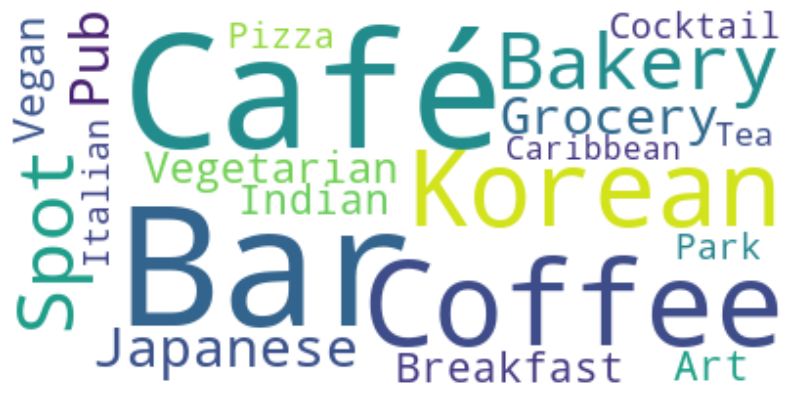

In [37]:
# display the word clouds
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(20) # set height

plt.imshow(cluster_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# More Data Visualization:

## For each cluster, determine the average distance the BJJ gym is from its surrounding venues:

In [38]:
gyms_w_dist = venue_grouped_wclust1[['Cluster','name']].join(venues_grouped[['name','distance_to_gym']].set_index('name'),on='name')
clusters_w_dist=gyms_w_dist.groupby(['Cluster']).mean()
clusters_w_dist

,distance_to_gym
Cluster,
0,424.272292
1,679.644472
2,566.843636


## Plot data to visualize how different clusters are spaced relative to surrounding venues:

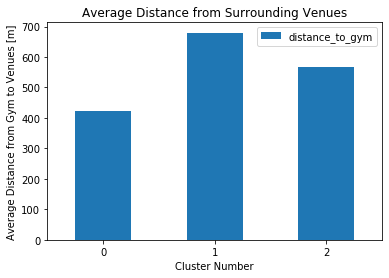

In [39]:
clusters_w_dist.plot(kind='bar')

plt.title('Average Distance from Surrounding Venues')
plt.xticks(rotation=0)
plt.xlabel('Cluster Number')
plt.ylabel('Average Distance from Gym to Venues [m]')

plt.show()

# Map the Data

## Create Folium Map

In [ ]:
# create map (from assignment)
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# set color scheme for the gym clusters (from assignment)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add nearby venue markers to the map
venue_colors = []
for lat, lon, poi, cat in zip(nearby_venues['venue_lat'], nearby_venues['venue_lng'], nearby_venues['venue_name'], nearby_venues['venue_cat']):
    label = folium.Popup(str(poi) + ',' + cat, parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.3).add_to(map_clusters)

# add clustered gym markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bjj_merged['lat'], bjj_merged['lng'], bjj_merged['name'], bjj_merged['Cluster']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
map_clusters
       